In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [2]:
import os, shutil
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in glob(os.path.join('../data/M87/raw/', 'j*_flc.fits')):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/M87/raw/M87_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
files = {'F475W': ['../data/M87/raw/M87_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)],
         'F814W': ['../data/M87/raw/M87_F814W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)]}
outputs = {'F475W': '../data/M87/reduced/M87_F475W_drc.fits',
          'F814W': '../data/M87/reduced/M87_F814W_drc.fits'}
diff_im = '../data/M87/reduced/M87_g-I.fits'
darks = {}

In [8]:
from drizzlepac import tweakreg

# Alignment and Drizzling

In [6]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M87/calibration/'

In [7]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F814W')

*******************************
Initial Alignment and Drizzling
--F814W: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F814W', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 11:30:34.369 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP2_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP3_flc.fits
    /Users/bco

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: -4.134765551511391e-07 -1.3965688364888358e-05
CD_21  CD_22: -1.3842665945943115e-05 -5.440831164060802e-07
CRVAL    : 187.72685321682164 12.39210147441414
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985690138981975
ORIENTAT : -92.23103282329328
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: -5.897950787659886e-07 -1.3495563189582613e-05
CD_21  CD_22: -1.3674843054771232e-05 -6.303631741564953e-07
CRVAL    : 187.69730388711722 12.39091519757981
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: -4.134615008994389e-07 -1.3965616934698255e-05
CD_21  CD_22: -1.384259602849334e-05 -5.440934188587821e-07
CRVAL    : 187.7268529864282 12.392101176402457
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985664816929336
ORIENTAT : -92.23108642597565
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: -5.897792860673257e-07 -1.3495494061608708e-05
CD_21  CD_22: -1.3674774158879485e-05 -6.3037260808473e-07
CRVAL    : 187.69730380796966 12.390914878585908
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927601715640313
ORIENTAT : -92.6743338783808
WCSNAME  :  TWEAK_F814W
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/M87/reduced/M87_F475W_drc.fits
{'cle

In [8]:
# %%time
# ppy.data.alignment.align_image_sets(files, reference_filter='F814W', verbose=True)

In [9]:
# %%time
# ppy.data.alignment.drizzle_image_sets(files, outputs, verbose=True, reference_filter='F814W')

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 11:37:28.349 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F475W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits', EXT=('SCI', 1) started at: 11:37:28.506 (15/03/2019)
     Found 1203 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F814W_drc.fits': 1203

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87/reduced/M87_F475W_drc.fits':
  #  Sou

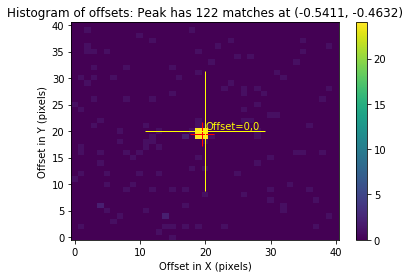

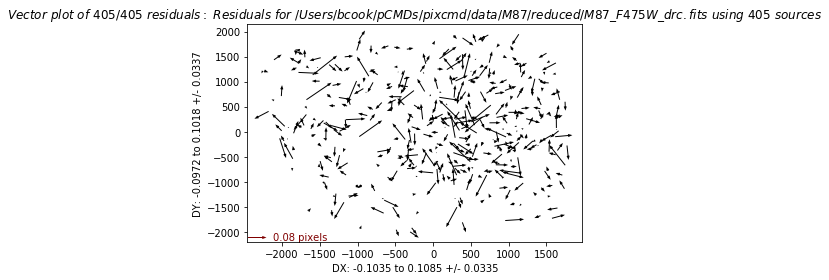

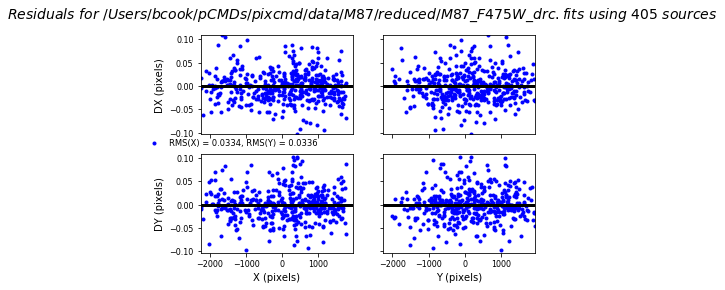

In [9]:
tweakreg.TweakReg([outputs['F814W'], outputs['F475W']], conv_width=4.0, threshold=100, nclip=10, shiftfile=False, writecat=False, clean=True,
                 interactive=False, updatehdr=False)

In [10]:
# Create difference image to check alignment
f1 = fits.open(outputs['F814W'])
f2 = fits.open(outputs['F475W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


# Automatic Source Extraction

In [11]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F814W'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 2min 7s, sys: 5.05 s, total: 2min 12s
Wall time: 2min 29s


In [12]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F814W'], threshold=10.0)

CPU times: user 3.78 s, sys: 5.11 s, total: 8.89 s
Wall time: 15.1 s
